In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.ticker as mtick

In [247]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Data import

In [269]:
data=pd.read_csv('./data/Life-Expectancy-Data-Updated.csv')

In [249]:
data['Economy']='Developed'
data.loc[data.Economy_status_Developing==1,'Economy']='Developing'

In [250]:
data.head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Economy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,Developing
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,Developed
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,Developing
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,Developing
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,Developed


## Basic description

In [251]:
data.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

## Correlation matrix

In [253]:
# select and display as list only non-categorical columns
data.select_dtypes(include=np.number).columns.tolist()

['Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Life_expectancy']

<Axes: >

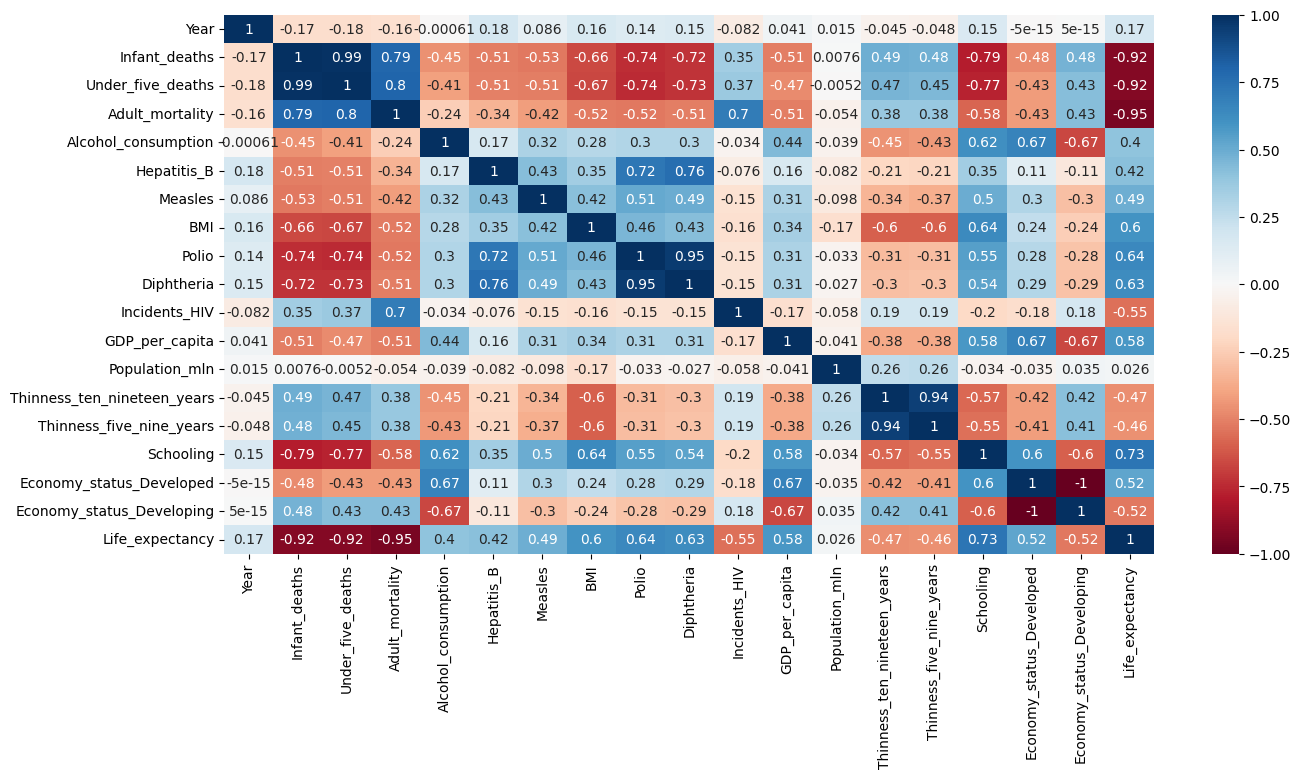

In [254]:
plt.figure(figsize=(15,7))
#corr_mat = data.drop(columns=['Country', 'Region', 'Economy']).corr()
corr_mat = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_mat,annot=True,cmap='RdBu')


## Data Visualisation

In [255]:
data.head(2)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Economy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,Developing
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,Developed


In [256]:
data['Population_mln_sqrt'] = data.Population_mln**(1/2)

### Life Expectancy vs GDP

In [257]:
px.scatter(data.sort_values(by='Year'),x='GDP_per_capita',y='Life_expectancy',animation_frame='Year',animation_group='Country',
           template='plotly_dark',color='Region',height=700,log_x=True,hover_name="Country",size='Population_mln_sqrt',
           title='<b>Life Expectancy Versus GDP of Countries in every Year')

### Life Expectancy over Years in Regions

In [258]:
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life_expectancy',animation_frame='Region',animation_group='Year',color='Country',
            markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years', range_y=[45,85],height=700)
fig.show()

### Life Expectancy vs BMI vs GDP

In [259]:
px.scatter_3d(data.sort_values(by='Year',ascending=False).drop_duplicates('Country'),y='BMI',x='GDP_per_capita',z='Life_expectancy',#log_x=True,
              template='plotly_dark',color='Region',size='Population_mln_sqrt',height=700,hover_name='Country',size_max=30)

In [ ]:
data.head(2)

## Alcohol vs Life expectancy

In [ ]:
data.drop_duplicates('Country').plot.scatter(x='Alcohol_consumption',y='Life_expectancy')

#### Simple regression plot

In [ ]:
data_plot = data.drop_duplicates('Country')
sns.regplot(data=data_plot,x='Alcohol_consumption',y='Life_expectancy')

### Confounders
In causal inference, a confounder is a variable that influences both the dependent variable and independent variable, causing a spurious association.

<img src="./pics/ice_cream.png" width="800" >

### Lets color the scatter points by continent

In [ ]:
data_plot = data.drop_duplicates('Country')
sns.scatterplot(data=data_plot,x='Alcohol_consumption',y='Life_expectancy',hue='Region')

### Filter Europe alone

In [ ]:
data_plot = data[data.Region.isin(['European Union'])].drop_duplicates('Country')
sns.scatterplot(data=data_plot,x='Alcohol_consumption',y='Life_expectancy',hue='Region')

In [ ]:
data_plot = data[data.Region.isin(['European Union'])].drop_duplicates('Country')
sns.regplot(data=data_plot,x='Alcohol_consumption',y='Life_expectancy')

### Plot all years

In [ ]:
data_plot = data[data.Region.isin(['European Union'])]
sns.regplot(data=data_plot,x='Alcohol_consumption',y='Life_expectancy')

## 3D plot - alcohol,gdp,life expectancy

In [ ]:
px.scatter_3d(data.sort_values(by='Year', ascending=False).drop_duplicates('Country'),
              y='Alcohol_consumption', x='GDP_per_capita', z='Life_expectancy', #log_x=True,
              template='plotly_dark',color='Region',size='Population_mln_sqrt',height=700,hover_name='Country',size_max=30)

# Regression Modelling

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data.head(2)

<img src="./pics/rsquared.jpeg" width="800" >

### Variables: 'GDP'

In [ ]:
results = smf.ols('Life_expectancy ~ GDP_per_capita', data=data).fit()
print(results.summary())

In [ ]:
data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,100)
plt.xlim(50,100)


In [ ]:
data.head()

### Variables: GDP, Thinness_ten_nineteen_years, BMI

In [ ]:
results = smf.ols('Life_expectancy ~ GDP_per_capita+Thinness_ten_nineteen_years+BMI',data=data).fit()
print(results.summary())

In [ ]:
data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita','Thinness_ten_nineteen_years','BMI']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,100)
plt.xlim(50,100)


In [ ]:
data.head(2)

### Variables: GDP_per_capita, Thinness_ten_nineteen_years, BMI,Infant_deaths

In [ ]:
results = smf.ols('Life_expectancy ~ GDP_per_capita+Thinness_ten_nineteen_years+BMI+Infant_deaths',data=data).fit()
print(results.summary())

### <span style="color:red">Variable Thinness_ten_nineteen_years lost significance!</span>.


In [ ]:
data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita','Thinness_ten_nineteen_years','BMI','Infant_deaths']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,85)
plt.xlim(50,85)


### Removing variable 'Thinness_ten_nineteen_years'

In [ ]:
results = smf.ols('Life_expectancy ~ GDP_per_capita+BMI+Infant_deaths',data=data).fit()
print(results.summary())

data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita','Thinness_ten_nineteen_years','BMI','Infant_deaths']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,85)
plt.xlim(50,85)

## How to increase fit for African countries?


#### 'Life_expectancy ~ GDP_per_capita+BMI+Infant_deaths'

In [ ]:
data.head(5)

### Adding HIV into regression!

In [ ]:
results = smf.ols('Life_expectancy ~ GDP_per_capita+BMI+Infant_deaths+Incidents_HIV',data=data).fit()
print(results.summary())

data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita','BMI','Infant_deaths','Incidents_HIV']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,85)
plt.xlim(50,85)

#### Variables: GDP_per_capita, BMI, Infant_deaths, Incidents_HIV, Alcohol_consumption, Year, Region

In [ ]:
results = smf.ols('Life_expectancy ~ GDP_per_capita+BMI+Infant_deaths+Incidents_HIV+Alcohol_consumption+I(Year-2000)+C(Region)',data=data).fit()
print(results.summary())


data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita',
                                                          'BMI','Infant_deaths','Incidents_HIV','Alcohol_consumption',
                                                          'Year','Region']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,85)
plt.xlim(50,85)

## Region effects if no other variables are present

In [ ]:
results = smf.ols('Life_expectancy ~ C(Region)',data=data).fit()
print(results.summary())

#### We can actually explain a lot of variance in Life Expectancy with regions only.

## Fitting the best model

#### Variables: GDP_per_capita, BMI, Infant_deaths, Incidents_HIV, Alcohol_consumption, Year
#### + nonlinearities!

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     8958.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:45:46   Log-Likelihood:                -4933.5
No. Observations:                2864   AIC:                             9899.
Df Residuals:                    2848   BIC:                             9994.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

(50.0, 85.0)

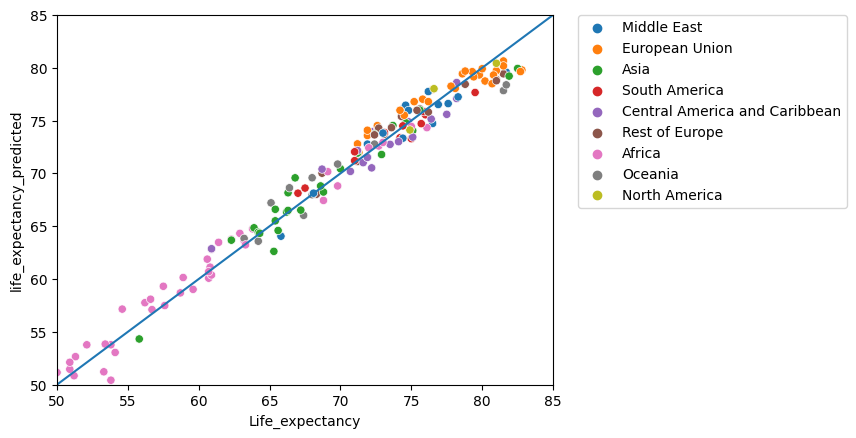

In [260]:
# this is my insert (acoording to the assumption that columns being predicted on are tose with the corr coeff > 0.6)
highrate_data = data[['Infant_deaths',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'BMI',
                 'Polio',
                 'Diphtheria',
                 'Schooling',
                 'Region',
                 'Life_expectancy']]

results = smf.ols('Life_expectancy ~ Infant_deaths+Under_five_deaths+Adult_mortality+BMI+Polio+Diphtheria+Schooling+Region',data=data).fit()
print(results.summary())

data['life_expectancy_predicted'] = results.predict(highrate_data)

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,85)
plt.xlim(50,85)


                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     4525.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:44:05   Log-Likelihood:                -6579.1
No. Observations:                2864   AIC:                         1.318e+04
Df Residuals:                    2854   BIC:                         1.324e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

(50.0, 85.0)

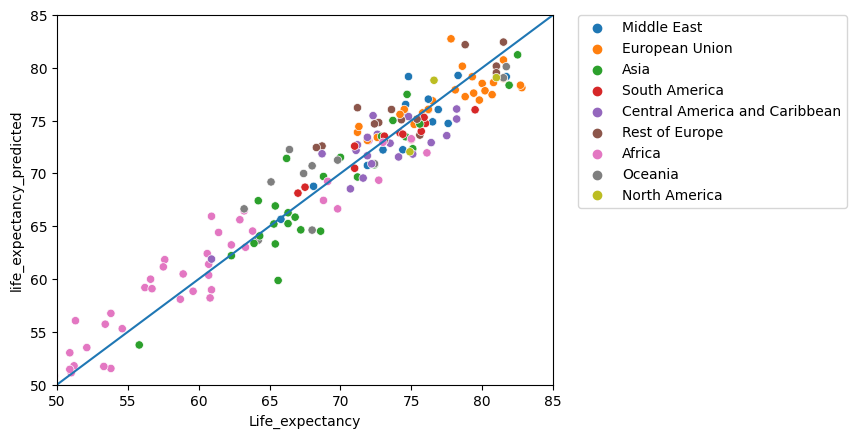

In [237]:
results = smf.ols('Life_expectancy ~ GDP_per_capita+BMI+I(BMI**2) \
                    +Infant_deaths +Incidents_HIV+ I(Incidents_HIV**2) \
                  +Alcohol_consumption+I(Alcohol_consumption**2)+I(Year-2000)',data=data).fit()
print(results.summary())

data['life_expectancy_predicted'] = results.predict(data[['GDP_per_capita','BMI','Infant_deaths',
                                                          'Incidents_HIV','Alcohol_consumption','Year','Region']])

sns.scatterplot(data=data.drop_duplicates('Country'),x='Life_expectancy',y='life_expectancy_predicted',hue='Region')
plt.plot([0,100],[0,100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.ylim(50,85)
plt.xlim(50,85)

# TRUE VS PREDICTED

### Lets investigate unexplained variance in Life Expectancy

In [261]:
data['residual'] = data['Life_expectancy']-data['life_expectancy_predicted']

In [262]:
px.scatter(data.sort_values(by='Year'),y='Life_expectancy',x='life_expectancy_predicted',animation_frame='Year',animation_group='Country',
           template='plotly_white',color='residual',height=700,log_x=True,hover_name="Country",size='Population_mln_sqrt',
           title='<b>Life Expectancy Predicted vs Real',color_continuous_scale='Bluered_r',range_color=[-5,5])

# Machine Learning Prediction

In [263]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [264]:
if 'life_expectancy_predicted_ml' in data.columns:
    data=data.drop(columns='life_expectancy_predicted_ml')
    
if 'residual_ml' in data.columns:
    data=data.drop(columns='residual_ml')

In [265]:


# Load the data
X = pd.get_dummies(data.drop(columns=['Population_mln',
                                      'Population_mln_sqrt','Country','Life_expectancy','life_expectancy_predicted','residual','Economy','Adult_mortality']))
y= data['Life_expectancy']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Create the random forest regressor
regressor = RandomForestRegressor(n_estimators=200,max_depth=8)

# Train the regressor
regressor.fit(X_train, y_train)

# Predict the test set
y_pred = regressor.predict(X_test)

# Calculate the R squared score
r2 = r2_score(y_test, y_pred)

print("R squared:", r2)

R squared: 0.9814008008751359


In [266]:
data['life_expectancy_predicted_ml'] = regressor.predict(X)

In [267]:
data['residual_ml'] = data['Life_expectancy']-data['life_expectancy_predicted_ml']

In [268]:
px.scatter(data.sort_values(by='Year'),y='Life_expectancy',x='life_expectancy_predicted_ml',animation_frame='Year',animation_group='Country',
           template='plotly_white',color='residual_ml',height=700,log_x=True,hover_name="Country",size='Population_mln_sqrt',
           title='<b>Life Expectancy Predicted vs Real',color_continuous_scale='Bluered_r',range_color=[-2,2])